<a href="https://colab.research.google.com/github/AbhishekChaganti/Deep-Learning/blob/main/EXP_10(RNN%20for%20IMDB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'love

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 75s 186ms/step - accuracy: 0.5331 - loss: 0.6869 - val_accuracy: 0.6250 - val_loss: 0.6564
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 83s 188ms/step - accuracy: 0.6920 - loss: 0.5730 - val_accuracy: 0.7031 - val_loss: 0.5958
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 81s 186ms/step - accuracy: 0.7355 - loss: 0.5290 - val_accuracy: 0.5938 - val_loss: 0.6919
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 82s 186ms/step - accuracy: 0.7705 - loss: 0.5034 - val_accuracy: 0.5312 - val_loss: 0.7140
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 82s 187ms/step - accuracy: 0.7367 - loss: 0.5298 - val_accuracy: 0.7344 - val_loss: 0.5816

Simple_RNN Score--->  [0.5270069241523743, 0.7359200119972229]


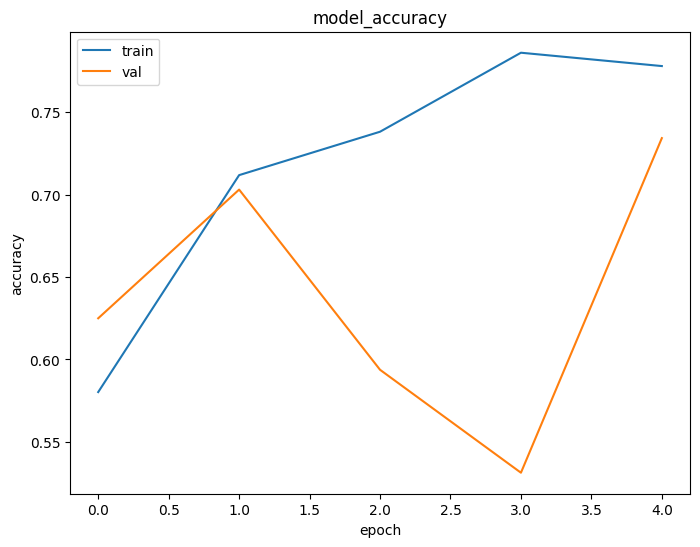

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential

vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
print(x_train[0])

word_idx = imdb.get_word_index()

word_idx = {i: word for word, i in word_idx.items()}

print([word_idx[i] for i in x_train[0]])

print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))

from tensorflow.keras.preprocessing import sequence

max_words = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

x_valid, y_valid = x_train[:64], y_train[:64]

x_train_, y_train_ = x_train[64:], y_train[64:]

embd_len = 32

RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size, embd_len, input_length=max_words))

RNN_model.add(SimpleRNN(128, activation='tanh', return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

print(RNN_model.summary())

RNN_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

history = RNN_model.fit(x_train_, y_train_, batch_size=64, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

print()
print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()